In [97]:
## 해야할 것
## 대표 뉴스포럼을 선정하여 그 뉴스사에서 낸 것들을 데이터 분석화 할 예정
## 

## 오류해결

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import os


In [99]:
## 폰트 설치 필수 한글 다 깨져요~~!!!!
import matplotlib.pyplot as plt
plt.rcParams['font.family']='gulim'

In [ ]:
df_makguli = pd.read_csv('data/네이버막걸리뉴스.csv')
df_makguli = df_makguli.drop_duplicates(subset=None,keep='first',inplace=False)
df_makguli.columns=['num','yyyymmdd','names','title','text']


In [100]:
# folder="data"
# subdir_names=os.listdir(folder) 
# #subdir_names에 폴더내의 모든 파일이름이 들어간다
# for file_name in subdir_names:
#     csv=pd.read_csv(folder+"\\"+file_name)

df = pd.read_csv('data/네이버막걸리뉴스.csv')
df_soju = pd.read_csv('data/네이버소주뉴스.csv')
df_gorangju = pd.read_csv('data/네이버고량주뉴스.csv')
df_juntongju = pd.read_csv('data/네이버전통주.csv')

In [101]:
df_soju

,Unnamed: 0,0,1,2,3
0,0,2021.01.01.,뉴스엔,손나은 “난 사이코패스였어” 은지원 소주에 소금 투척 제안 후 셀프디스(갬...,"지원 오빠 소주 마시지? 소주에 뭘 타지?""라며 분노를 드러냈다. 이에 손나은은 ""..."
1,1,2021.01.01.,에너지경제,"식음료 업계 ‘업뉴얼(upgade+renewal)’ 바람···""소비자는 즐겁다""","하이트진로는 최근 진로 미니 팩소주를 유흥용으로 출시하고 배달, 포장용 시장 강화에..."
2,2,2021.01.01.,스포츠투데이,"'수미네 반찬' 김수미 ""2021년 소의 해, 내가 소띠다"" [텔리뷰]","묵은지 꼬리찜을 만들면서 김수미는 고기 잡내 제거부터 시작했다. 김수미는 ""소꼬리를..."
3,3,2021.01.01.,뉴시스,식∙음료업계에 부는 '업뉴얼' 바람 '눈길',"하이트진로는 최근 진로 미니 팩소주를 유흥용으로 출시하고 배달, 포장용 시장 강화에..."
4,4,2021.01.01.,농기자재신문,자연과 인간이 함께하는 세상-남보가 꿈꿉니다.,친환경 농업의 리더 ‘남보’ 주요제품 히까리골드 | 공시-1-3-290 | 히까리골...
...,...,...,...,...,...
20809,20809,2020.01.01.,스포츠동아,"[TV북마크] ‘블랙독’ 라미란, 센터의 품격…내부고발 소신발언",성순이 하늘에게 소주잔을 먼저 건네며 어느새 이들이 서로 스며들기 시작했음을 보여주...
20810,20810,2020.01.01.,매일일보,유통업계 '온라인 시장' 거래 질서 확립도 필요,주류의 경우 주류의 온라인 판매는 국민 편의와 전통주 진흥차원에서 경주교동법주·조옥...
20811,20811,2020.01.01.,아이뉴스24,"유통街, 경자년 새해 맞아 관련 상품 출시 봇물",젊은 층을 중심으로 남들과 다른 독창적 아이템을 선호하는 트렌드가 퍼지는 가운데 자...
20812,20812,2020.01.01.,헤럴드경제,쉽고 확실한 새해 다이어트? “없어요…술 줄이고 운동하세요”,"소주는 한 잔(45㎖)에 63㎉, 맥주 한 잔(500㎖)은 185㎉, 와인 한 잔(..."


In [102]:
## 중복값 제거
df = df.drop_duplicates(subset=None,keep='first',inplace=False)


In [103]:
## colums 이름 수정
df.columns=['num','yyyymmdd','names','title','text']
df_soju.columns = ['num','yyyymmdd','names','title','text']
df_gorangju.columns = ['num','yyyymmdd','names','title','text']


In [104]:
## yyyymmdd에서 yyyy.mm의 데이터를 새로운 컬럼에 추가한다. 
## 월단위로 그룹을 지기 위해
df['yyyymm'] = df['yyyymmdd'].apply(lambda x: x[0:7])
df_soju['yyyymm'] = df_soju['yyyymmdd'].apply(lambda x: x[0:7])
df_gorangju['yyyymm'] = df_gorangju['yyyymmdd'].apply(lambda x: x[0:7])
df_gorangju


,num,yyyymmdd,names,title,text,yyyymm
0,0,2020.12.31.,뉴스핌,"[중국 리뷰] 미증유의 대재앙,코로나19와 2020년 중국경제 <하>",[뉴스핌 베이징 = 최헌규 특파원] 10월 26일 중국 구이저우성 마오타이진에 수만...,2020.12
1,1,2020.12.31.,YTN사이언스,망가진 명품가방을 살려내는 기술,"가죽이 구겨져 버린 명품가방, 기술자는 가방을 분리해 가죽에 고량주를 부어 불을 붙...",2020.12
2,2,2020.12.30.,뉴스핌,"[12/30 중국증시종합] 완화적 통화정책 유지, 상하이 지수 1.05%↑","섹터별로 살펴보면 전기 설비, 석탄, 비철금속, 바이주(白酒·고량주), 철강, 전력...",2020.12
3,3,2020.12.29.,서울와이어,[옛날옛적 수출-33] 여공 손끝서 빚어진 최초의 억불탑,"""상공부 섬유관련부서 직원들은 매일 밤 요정에서 술타령으로 밤을 지새우는 반면 다른...",2020.12
4,4,2020.12.29.,뉴스핌,"[금일 중국증시 포인트(12.29)] 고량주자동차株 강세, 의료보험 의약품 협상결...",등 고량주 대표 종목 사상 최고가 경신 △ 자동차 및 자동차 부품주 강세 △ 202...,2020.12
...,...,...,...,...,...,...
312,312,2020.02.04.,코리아쉬핑가제트,푸드톡앤톡/속풀이 해장음식,"맥주나 막걸리처럼 속이 더부룩해지기 쉬운, 즉 소화를 지연시키는 ‘이체증’을 일으키...",2020.02
313,313,2020.02.03.,동아일보언론사 선정,한국 맥주보다 맛있는 북한의 이것은? [송홍근 기자의 언박싱평양],일반 주민들은 ‘감주’라고 일컫는 막걸리나 중국에서 수입한 싸구려 고량주를 주로 마...,2020.02
314,314,2020.02.02.,아시아경제,"[드링킷] '술방'만 있으면 혼술, 외롭지 않아",대학 시절 일명 '토마토(토하고 마시고 토하고)'의 삶을 살았다고 밝힌 그는 주종을...,2020.02
315,315,2020.01.14.,뉴스핌,"중국 부호들의 '라이프 스타일', 부동산 투자 선호 일본 해외 여행 1순위로 꼽...",와인은 백주(고량주)를 제치고 3위를 기록했다. 여성 부호들은 화장품 선물 증정하는...,2020.01


In [105]:
## 그룹화[].agg(카운트)
df_groupby = df.groupby(['yyyymm']).agg('size')
df_soju_groupby = df_soju.groupby(['yyyymm']).agg('size')
df_gorangju_groupby = df_gorangju.groupby(['yyyymm']).agg('size')
df_gorangju_groupby


yyyymm
2020.01     2
2020.02     8
2020.03     7
2020.04    65
2020.05    25
2020.06    47
2020.07    47
2020.08    25
2020.09    18
2020.10    16
2020.11    34
2020.12    23
dtype: int64

In [106]:
## 갯수를 내림차수로 정렬한다 이유!! 뉴스사를 뽑기위해? 대표 뉴스사를 추려서 
# df_groupby.sort_values(by='yyyymm', ascending=False)[:20]

<AxesSubplot:xlabel='yyyymm'>

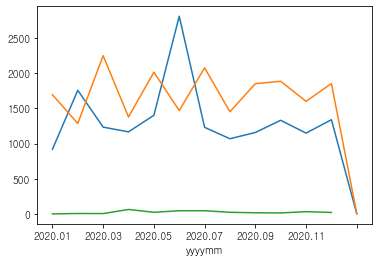

In [107]:
## 그래프 그리기
df_groupby.plot()
df_soju_groupby.plot()
df_gorangju_groupby.plot()

In [108]:
# 저장
# df.to_csv('네이버뉴스결과피터링.csv', index=False)